Task-1

•	Write a procedure that outputs a random signed graph according to the following model: on input $n$ (number of vertices) and $0<p^+,p^-<1$ with $p^++p^-<1$, determine, for each of the $\binom{n}{2}$ many vertex pairs~$e$ if $e$ is positive (with probability $p^+$) or negative (with probability $p^-$) or not present (with probability $1-p^+-p^-$)

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import itertools

from openpyxl import Workbook, load_workbook
import os

import datetime
import time
from datetime import timedelta

In [3]:
def add_entries_to_excel(entries, filepath):
    # If the file exists, load the existing workbook; otherwise, create a new workbook
    if os.path.exists(filepath):
        wb = load_workbook(filepath)
    else:
        wb = Workbook()
    
    # Select the active worksheet
    ws = wb.active
    
    # If the file is newly created, add column headers
    if not os.path.exists(filepath):
        ws.append(['Number of Vertex', 'Time without Visualization', 'Time with Visualization'])
    
    # Add entries
    ws.append(entries)
    
    # Save the workbook with the specified filepath
    wb.save(filepath)
    
def write_in_execl(filename, entries):
    # Specify the filepath where you want to save the Excel file
    filepath = os.getcwd() + '/performance_check/'

    # Add entries to Excel file with the specified filepath
    add_entries_to_excel(entries, filepath + filename)

In [4]:
def generate_random_signed_graph(n, p_plus, p_minus):
    if p_plus + p_minus >= 1:
        raise ValueError("p+ + p- should be less than 1.")
    elif p_plus < 0:
        raise ValueError("p+ should be greater than 0.")
    elif p_minus < 0:
        raise ValueError("p- should be greater than 0.")
        
    G = nx.Graph()

    # Add n vertices to the graph
    G.add_nodes_from(range(n))

    # Generate edges with positive, negative, or no sign based on probabilities
    all_edges = list(itertools.combinations(range(n), 2))
    for edge in all_edges:
        prob = random.random()
        sign = None
        if prob < p_plus:
            sign = 1
        elif prob < p_plus + p_minus:
            sign = -1
        
        if sign: 
            u, v = edge
            G.add_edge(u, v, sign=sign)

    return G

def write_signed_graph_to_file(graph):
    current_date = datetime.datetime.now().strftime("%Y-%m-%d-%m-%s")
    filepath = fr"{os.getcwd()}/generated_files/"
    filename = filepath + f"signed_graph_{current_date}.txt"
    
    with open(filename, 'w') as file:
        for u, v, data in graph.edges(data=True):
            sign = data.get('sign', 1)
            file.write(f"{u} {v} {sign}\n")
    

Please enter maximum number of nodes wanted to check: 20


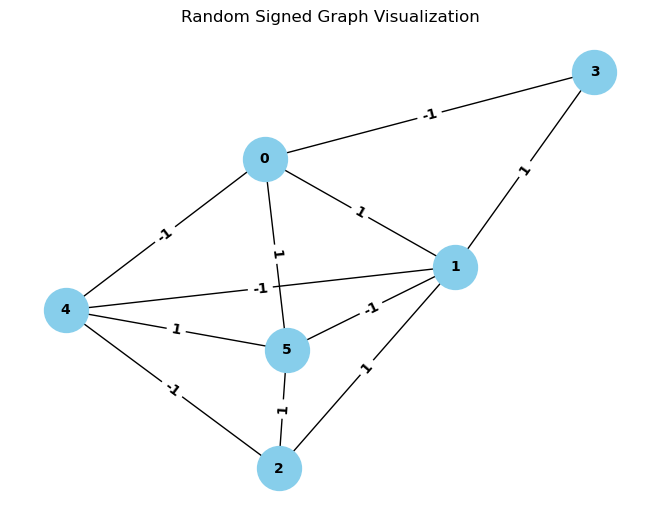

In [12]:
nodes_to_check = 50
p_plus = 0.4
p_minus = 0.3
max_nodes_to_check = int(input("Please enter maximum number of nodes wanted to check: "))

# num_nodes = int(input("Please enter number of nodes for the graph: "))
# avg_degree = int(input("Please enter average number of degree for a node: "))

while(nodes_to_check <= max_nodes_to_check):
    
    start_time = time.monotonic() 
    n_vertices = nodes_to_check
    
    
    random_signed_graph = generate_random_signed_graph(n_vertices, p_plus, p_minus)
    endtime_prof_WoV = time.monotonic()
    
    # Display the graph using NetworkX and matplotlib
    pos = nx.spring_layout(random_signed_graph)
    nx.draw(random_signed_graph, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(random_signed_graph, 'sign')
    nx.draw_networkx_edge_labels(random_signed_graph, pos, edge_labels=labels, font_size=10, font_weight='bold')
    plt.title("Random Signed Graph Visualization")
    plt.show()

    endtime_prof_WV = time.monotonic()
    
    # storing the performance time in a excel file
    filename = "performance_check_prof_algo.xlsx" 
    totaltime_prof_WoV, totaltime_prof_WV = timedelta(seconds=endtime_prof_WoV - start_time), timedelta(seconds=endtime_prof_WV - start_time)
    prof_performance_entries = n_vertices, totaltime_prof_WoV, totaltime_prof_WV
    write_in_execl(filename, prof_performance_entries)
     
    nodes_to_check = nodes_to_check + 50
    
#     write_signed_graph_to_file(random_signed_graph)

## Erdős-Rényi Model

The Below code is Erdős-Rényi model way of generating random graph. 

In this we will get number of nodes and average number of degree from the user. Using Erdős-Rényi algorithm from networkX we are generating graph. Generated graph is visualized and stored seperately in generated_files folder with file naming of "signed_graph_{current_date}.txt". 

In the visualization green line indicates a positive connection and red line indicates negative connection.

In [6]:
def erdos_renyi_signed_graph(num_nodes, avg_degree):
    # Generate a random graph using Erdős-Rényi model
    G = nx.erdos_renyi_graph(num_nodes, avg_degree / (num_nodes - 1))
    
    # Assign random signs to the edges
    for u, v in G.edges():
        sign = random.choice([1, -1])
        G[u][v]["sign"] = sign
    
    return G

def convert_graph_to_dict(G):
    
    # making graph_dict for further purpose
    graph_dict = {}
    for u, v, sign in G.edges(data="sign"):
        if u not in graph_dict:
            graph_dict[u] = []
        if v not in graph_dict:
            graph_dict[v] = []
        graph_dict[u].append((v, sign))
        graph_dict[v].append((u, sign))
    
    return graph_dict
    

def visualize_signed_graph(G):
    
    # Visualize the graph with positive edges in green and negative edges in red
    pos_edges = [(u, v) for u, v, sign in G.edges(data="sign") if sign == 1]
    neg_edges = [(u, v) for u, v, sign in G.edges(data="sign") if sign == -1]

#     pos_nodes = set([u for u, v in pos_edges] + [v for u, v in pos_edges])
#     neg_nodes = set([u for u, v in neg_edges] + [v for u, v in neg_edges])

    pos = nx.spring_layout(G)
    
    plt.figure(figsize=(8,6))
    
    nx.draw_networkx_nodes(G, pos, nodelist=list(G.nodes()), node_color="white", node_size=500, edgecolors='black', linewidths=1.0)
#     nx.draw_networkx_nodes(G, pos, nodelist=neg_nodes, node_color="r", node_size=100)
    nx.draw_networkx_edges(G, pos, edgelist=pos_edges, edge_color="g")
    nx.draw_networkx_edges(G, pos, edgelist=neg_edges, edge_color="r")
    nx.draw_networkx_labels(G, pos,  font_size=12, font_color='black')
    
    plt.plot([0], color='green', label='Positive Connection')
    plt.plot([0], color='red', label='Negative Connection')

    # Adding legend
    plt.legend()

    plt.show()
    



Please enter maximum number of nodes wanted to check: 20


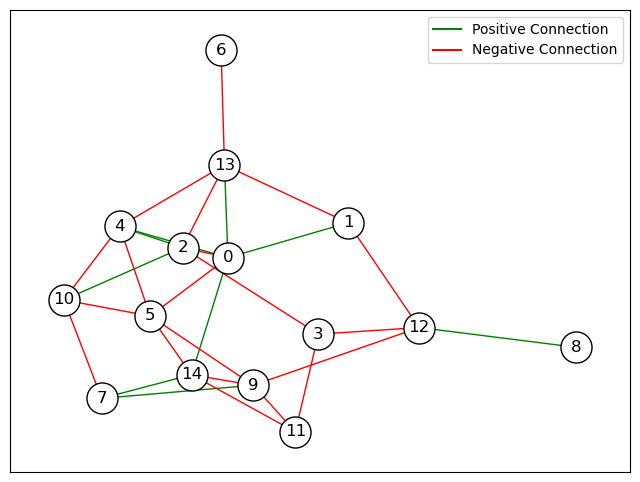

In [9]:
nodes_to_check = 50
initial_avg_degree = 4
max_nodes_to_check = int(input("Please enter maximum number of nodes wanted to check: "))


# num_nodes = int(input("Please enter number of nodes for the graph: "))
# avg_degree = int(input("Please enter average number of degree for a node: "))

while(nodes_to_check <= max_nodes_to_check):
    
    start_time = time.monotonic() 
    
    num_nodes = nodes_to_check
    avg_degree = initial_avg_degree
    
    
    G = erdos_renyi_signed_graph(num_nodes, avg_degree)
    endtime_erm_WoV = time.monotonic() 
    
    graph_dict = convert_graph_to_dict(G)
    
    visualize_signed_graph(G)
    endtime_erm_WV = time.monotonic() 
    
    # storing the performance time in a excel file
    filename = "performance_check_Erdős_Rényi.xlsx" 
    totaltime_erm_WoV, totaltime_erm_WV = timedelta(seconds=endtime_erm_WoV - start_time), timedelta(seconds=endtime_erm_WV - start_time)
    erm_performance_entries = num_nodes, totaltime_erm_WoV, totaltime_erm_WV
    write_in_execl(filename, erm_performance_entries)
    
    initial_avg_degree = initial_avg_degree + 4
    nodes_to_check = nodes_to_check + 50
    write_signed_graph_to_file(G)



performance problem:
1) Visualization curve is different because in 2nd algorithm, average degree for every node is increasing.    
    